# Final Project

## Data Collection

In [1]:
import pandas as pd
import numpy as np 

mPCR = pd.read_csv("data/mPCR.csv").apply(pd.to_numeric)
cPCR = pd.read_csv("data/cPCR.csv").apply(pd.to_numeric)
print(cPCR.head())

   deltaZ/L       1/F
0  0.952355  0.451676
1  0.923634  0.509886
2  0.899607  0.653958
3  0.915279  0.851072
4  0.895834  0.956380


### Data Standardization

In [2]:
from sklearn import preprocessing

cPCR["deltaZ/L"] = preprocessing.scale(cPCR["deltaZ/L"])
cPCR["1/F"] = preprocessing.scale(cPCR["1/F"])

mPCR["deltaZ/L"] = preprocessing.scale(mPCR["deltaZ/L"])
mPCR["1/F"] = preprocessing.scale(mPCR["1/F"])
print(cPCR.head())

   deltaZ/L       1/F
0  1.348427 -1.578051
1  1.022839 -1.486009
2  0.750468 -1.258199
3  0.928127 -0.946521
4  0.707693 -0.780006


## Model

### Linear Regression

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
          cPCR["deltaZ/L"].values, cPCR["1/F"].values, test_size=0.33, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [4]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

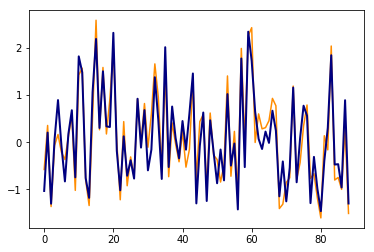

Coefficients: 
 [-0.9361792]
Mean squared error: 0.14
Variance score: 0.86


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Plot outputs
plt.plot(y_test, color='darkorange', label='data')
plt.plot(y_pred, color='navy', linewidth=2, label="Linear Regressor")

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

### Support Vector Regression

In [6]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)

y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)

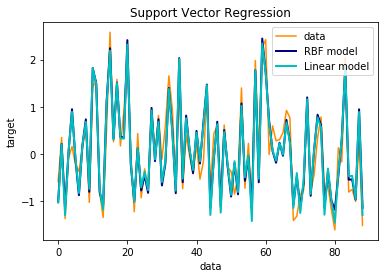

Mean squared error: 0.14
Variance score: 0.85
Mean squared error: 0.14
Variance score: 0.86


In [7]:
# Look at the results
lw = 2
plt.plot(y_test, color='darkorange', label='data')
plt.plot(y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_rbf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_rbf))

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_lin))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_lin))

### Random Forest Regression

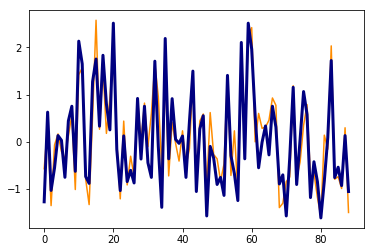

Mean squared error: 0.22
Variance score: 0.85


In [8]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor()
y_rf= regr_rf.fit(X_train, y_train).predict(X_test)

# Plot outputs
plt.plot(y_test,  color='darkorange', label='data')
plt.plot(y_rf, color='navy', linewidth=3, label='Random Forest Regressor')

plt.show()

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_rf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_rbf))
